In [1]:
from KP import KnapsackProblem, find_root
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
%matplotlib inline

### Plot Example
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

#### Weight, Value, and Limit

## Linear Approximation of $\gamma(T)$

We approximate $\gamma(T)$ defined as

$$\gamma(T) = -T \ln z_0(T),$$

(where $z_0(T)$ is the minimum of the constraint potential as a function of temperature) by the linear function 

$$ \gamma(T) = \gamma'_0T + \gamma_0 + O(T^2)$$

where we determine $\gamma'_0$ and $\gamma_0$ by evaluating $\gamma(T)$ at two points $T_1$ and $T_2$. 


In [2]:
items = (
    ("map", 9, 150), ("compass", 13, 35), ("water", 153, 200), ("sandwich", 50, 160),
    ("glucose", 15, 60), ("tin", 68, 45), ("banana", 27, 60), ("apple", 39, 40),
    ("cheese", 23, 30), ("beer", 52, 10), ("suntan cream", 11, 70), ("camera", 32, 30),
    ("t-shirt", 24, 15), ("trousers", 48, 10), ("umbrella", 73, 40),
    ("waterproof trousers", 42, 70), ("waterproof overclothes", 43, 75),
    ("note-case", 22, 80), ("sunglasses", 7, 20), ("towel", 18, 12),
    ("socks", 4, 50), ("book", 30, 10),
    )

# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
Wlimit = 400

# defining instance of problem
KP_init = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit)

In [3]:
# computing exact values for gamma(T)
T0_vals = np.arange(0.1, 8.0, 0.1)
gamma_vals = np.zeros_like(T0_vals)

for m in tqdm(range(len(gamma_vals))):
    T0 = T0_vals[m]
    z_res, _ = find_root(KP_init.constraint, T=T0)
    gamma_vals[m] = -np.log(z_res)*T0

  0%|          | 0/79 [00:00<?, ?it/s]

In [4]:
# defining equation for linear approximation
x1= 0.1
y1 =  -x1*np.log(find_root(KP_init.constraint, T=x1)[0])

x2 = 0.12
y2 = -x2*np.log(find_root(KP_init.constraint, T=x2)[0])

m = (y2-y1)/(x2-x1)

linear_func = lambda x: m*(x-x1) + y1

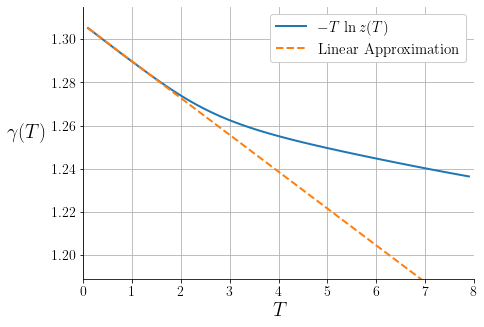

In [5]:
plt.figure(figsize = (7,5))
ax = plt.subplot(111)

plt.plot(T0_vals, gamma_vals, linewidth = 2, label = r'$-T\,\ln z(T)$')
plt.plot(T0_vals, linear_func(T0_vals),  linestyle = '--', linewidth = 2, label = 'Linear Approximation')
plt.xlabel(r'$T$', fontsize = 20)
plt.ylabel(r'$\gamma(T)$', fontsize = 20, rotation =0, labelpad = 25.0)
plt.xlim(0,8)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylim(1.189, 1.315)
plt.grid(alpha = 1)
plt.legend(loc = 'best', fontsize = 15, framealpha = 1)
# plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/LaTeX_Scientific_reports/linear_comparison.png', dpi = 100, bbox_inches='tight' )
plt.show()